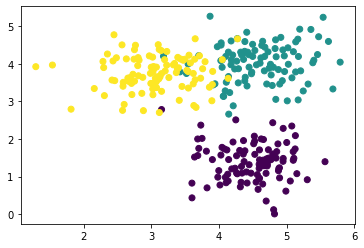

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
def data_generator(numClasses, numElems):
    data = np.empty((sum(numElems), 2))
    target = np.empty(sum(numElems))
    
    for cl,n in zip(list(range(numClasses)), numElems):
        start_pos = sum(numElems[:cl])
        
        x_c, y_c = random.random()*5, random.random()*5
        data[start_pos:start_pos+n,:] = np.random.normal([x_c,y_c], 0.5, (n, 2))
        target[start_pos:start_pos+n] = np.full(n, cl)
        
    return data, target

data, target = data_generator(3, [100,100,100])
plt.scatter(data[:,0], data[:,1], c=target)

In [90]:
class kmean:
    def __init__(self,n_classes,random_state):
        self.n_classes = n_classes
        self.random_state=random_state
        self.history=[]
        self.history.append(random_state)
    def dist (self,x,y):
        return np.linalg.norm(x-y)
    def fit(self, data):
        self.centroid=[]
        for i in data:
            distance=[]
            distance = [self.dist(i,centroid) for centroid in self.random_state]
            self.centroid.append(np.argmin(distance))
        new_centroids = []
        new_df = pd.concat([pd.DataFrame(data), pd.DataFrame(self.centroid, columns=['cluster'])],axis=1)
        for c in set(new_df['cluster']):
            current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
            cluster_mean = current_cluster.mean(axis=0)
            new_centroids.append(cluster_mean)
            self.history.append(cluster_mean)
        return new_centroids

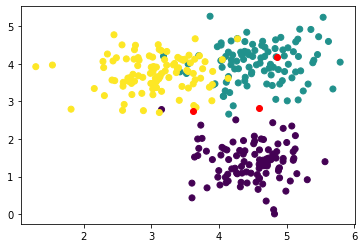

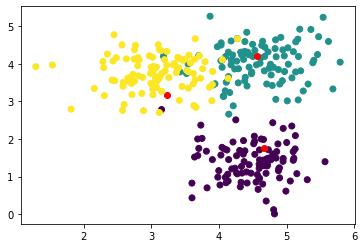

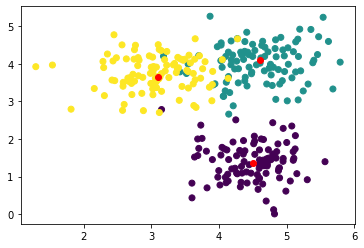

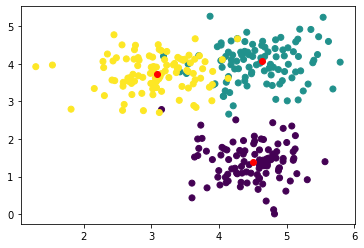

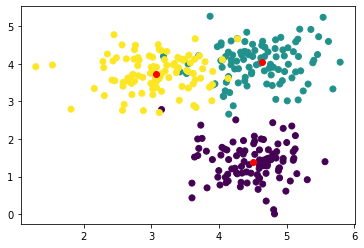

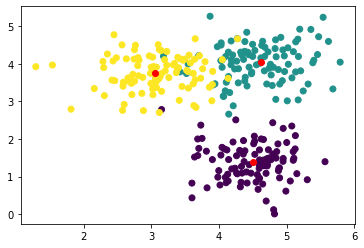

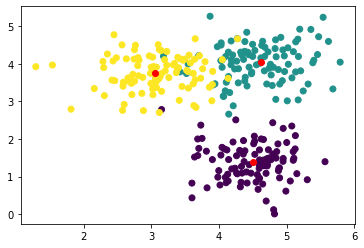

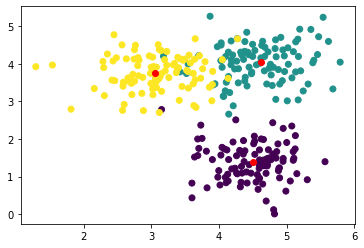

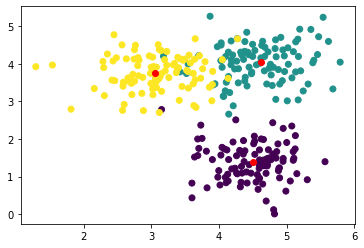

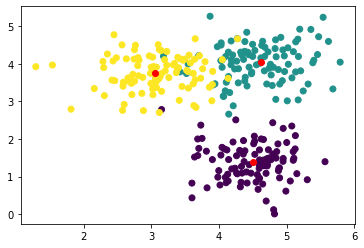

In [91]:
rand_centroids = random.sample(range(0, len(data)), 3)
c=[data[i] for i in rand_centroids]
for i in range(10):
    k=kmean(3,c)
    c=k.fit(data)
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=target)
    plt.scatter(np.array(c)[:, 0], np.array(c)[:, 1], color='red')
    plt.show()